## APLICACIÓN 
#### Nombre: Andrea Ulloa

##### Definiendo las librerías a usar

In [2]:
import os
import pandas as pd
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

from dbfread import DBF

##### Descargar la base de datos de Stata

In [3]:
os.chdir('C:\Programacion en finanzas\Aplicacion')

In [4]:
pobreza = pd.read_stata('b2.dta')

In [5]:
pobreza.head()

,coddpto,pobre,urbano
0,01,0.304887,0.506370
1,02,0.175417,0.634366
2,03,0.290863,0.439518
3,04,0.060091,0.914010
4,05,0.393552,0.579568


In [7]:
# Para no tener los valores del porcentaje de pobreza por departamento entre 0 y 1, lo multiplico por 100
#para nuestra escala sea mejor al hacer el gráfico
pobreza['urbano'] *= 100

In [8]:
pobreza.head()

,coddpto,pobre,urbano
0,01,30.488655,50.636959
1,02,17.541739,63.436634
2,03,29.086292,43.951813
3,04,6.009135,91.400986
4,05,39.355209,57.956783


###### Importar el DBF y el Shapefile (convertirlo en data frame en pandas) a nivel departamental

In [9]:
DATAMAP = DBF('DEPARTAMENTOS.dbf', load=True,encoding='latin1')
DATAMAP.records

[OrderedDict([('IDDPTO', '01'),
              ('DEPARTAMEN', 'AMAZONAS'),
              ('CAPITAL', 'CHACHAPOYAS'),
              ('FUENTE', 'INEI')]),
 OrderedDict([('IDDPTO', '02'),
              ('DEPARTAMEN', 'ANCASH'),
              ('CAPITAL', 'HUARAZ'),
              ('FUENTE', 'INEI')]),
 OrderedDict([('IDDPTO', '03'),
              ('DEPARTAMEN', 'APURIMAC'),
              ('CAPITAL', 'ABANCAY'),
              ('FUENTE', 'INEI')]),
 OrderedDict([('IDDPTO', '04'),
              ('DEPARTAMEN', 'AREQUIPA'),
              ('CAPITAL', 'AREQUIPA'),
              ('FUENTE', 'INEI')]),
 OrderedDict([('IDDPTO', '05'),
              ('DEPARTAMEN', 'AYACUCHO'),
              ('CAPITAL', 'AYACUCHO'),
              ('FUENTE', 'INEI')]),
 OrderedDict([('IDDPTO', '06'),
              ('DEPARTAMEN', 'CAJAMARCA'),
              ('CAPITAL', 'CAJAMARCA'),
              ('FUENTE', 'INEI')]),
 OrderedDict([('IDDPTO', '07'),
              ('DEPARTAMEN', 'CALLAO'),
              ('CAPITAL', 'CALLAO'

In [10]:
shp_path = "DEPARTAMENTOS.shp"

In [11]:
sf = shp.Reader(shp_path)

In [12]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [13]:
DATASHAPE = read_shapefile(sf)
DATASHAPE.shape

(25, 5)

In [14]:
DATASHAPE

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,coords
0,01,AMAZONAS,CHACHAPOYAS,INEI,"[(-77.81210611199998, -2.989615345999937), (-7..."
1,02,ANCASH,HUARAZ,INEI,"[(-77.64692386199994, -8.050861350999867), (-7..."
2,03,APURIMAC,ABANCAY,INEI,"[(-73.74632010800002, -13.174564355999962), (-..."
3,04,AREQUIPA,AREQUIPA,INEI,"[(-71.98109435700002, -14.640622106999956), (-..."
4,05,AYACUCHO,AYACUCHO,INEI,"[(-74.34842848399995, -12.175033104999955), (-..."
5,06,CAJAMARCA,CAJAMARCA,INEI,"[(-78.7003432379999, -4.6276929729999665), (-7..."
6,07,CALLAO,CALLAO,INEI,"[(-77.13520775099983, -11.817821212999945), (-..."
7,08,CUSCO,CUSCO,INEI,"[(-72.97280210799966, -11.251894478999816), (-..."
8,09,HUANCAVELICA,HUANCAVELICA,INEI,"[(-74.57117610900002, -11.9871041049999), (-74..."
9,10,HUANUCO,HUANUCO,INEI,"[(-76.00485590739771, -8.30516971191247), (-76..."


###### Creación de un mapa de calor del Perú que muestre por intensidad de color los departamentos con mayor población pobre 

In [15]:
def calc_color(data, color=None):
        if color==1: color_sq=['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq=['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors='YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors ='YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
                                labels=range(6))                                             
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;


1: 2 => 9 
2: 10 => 13 
3: 14 => 22 
4: 23 => 28 
5: 29 => 31 
6: 32 => 38 

   1   2   3   4   5   6


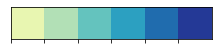

In [23]:
ct,b=calc_color(pobreza.pobre,color=2)

In [18]:
idx =list(DATASHAPE.index)
idx

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [24]:
def plot_map_fill_multiples_ids_tone(sf, title, depart,  
                                     color_ton, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (12,17)):
    '''
    La función se redefine para poder tener un Heatmap o mapa de calor
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for id in depart:
        #print(id)
        shape_ex = sf.shape(id)
        DIST=sf.record(id)['DEPARTAMEN']

        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[depart.index(id)])
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        #plt.text(x0, y0, DIST, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)   

<Figure size 864x1224 with 0 Axes>

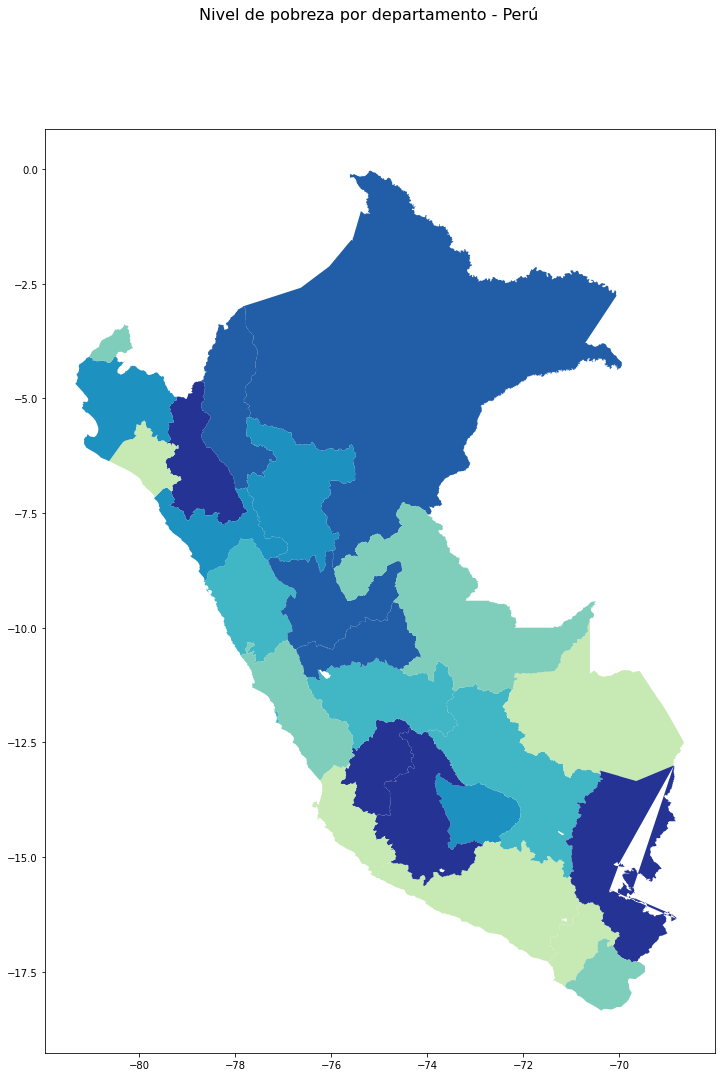

In [25]:
plot_map_fill_multiples_ids_tone(sf, "Nivel de pobreza por departamento - Perú", idx,  
                                     ct, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (12,17))

###### En un solo paso hacer todo lo anterior. Automatizando y juntando la barra de colores con el gráfico

In [26]:
def plot_peru_data(sf, title, depart, data=None, 
                      color=None, print_id=False,figsize=(12,17)):
    '''
    Se dibuja el mapa 
    '''
    
    color_ton, bins = calc_color(data, color)
    plot_map_fill_multiples_ids_tone(sf, title, depart,  
                                     color_ton, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = figsize);


1: 2 => 9 
2: 10 => 13 
3: 14 => 22 
4: 23 => 28 
5: 29 => 31 
6: 32 => 38 

   1   2   3   4   5   6


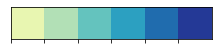

<Figure size 864x1224 with 0 Axes>

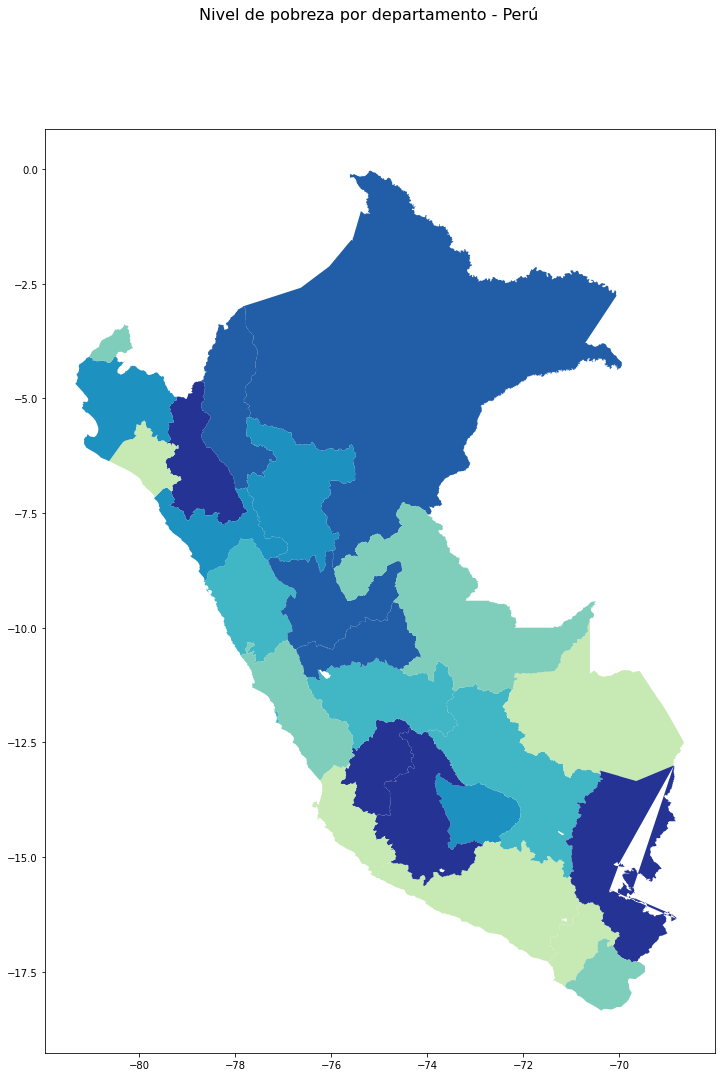

In [28]:
color_pallete = 2
plot_peru_data(sf,'Nivel de pobreza por departamento - Perú', idx, data=pobreza.pobre,color=color_pallete,print_id=False)